In [214]:
import pandas as pd
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

In [215]:
df=pd.read_csv(r"C:\Users\akhil\Major_Project\data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [217]:
column=list(df.columns)
column_update=[]
for col in column:
    column_update.append(col.strip().replace('  ',' ').replace(' ','_').replace('-','_').lower())
    
df.columns=column_update
df

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [218]:
df.rename(columns={'thinness_1_19_years':'thinness_10_19_years'},inplace=True)
df.rename(columns={'hiv/aids' : 'hiv_and_aids'} , inplace=True)
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_and_aids,gdp,population,thinness_10_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Missing Values

In [219]:
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv_and_aids                         0
gdp                                448
population                         652
thinness_10_19_years                34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

### Treating the missing values

In [220]:
df1=df.copy()
df1.dropna(inplace=True)
df1.isnull().sum()
df1.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_and_aids,gdp,population,thinness_10_19_years,thinness_5_9_years,income_composition_of_resources,schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [221]:
# for example, if a country has gdp of 170 and the average gdp of the dataset lets say 1000, by the
# domain knowledge we can say that if we  use the mean, median or mode values to fill the missing data
# may not lead to a good accuracy soo lets fill the NaN values with preceeding and sucesding values
df1=df.copy()

def fill_nan(i):
    df1[i]=df1.groupby('country')[i].fillna(method='ffill')
    df1[i]=df1.groupby('country')[i].fillna(method='bfill')
    df1[i]=df1[i].replace(np.nan,df1[i].mean())

cols=df1.columns
categorical_cols=['country','status']
for col in cols:
    if col not in categorical_cols:
        fill_nan(col)

df=df1.copy()
print(df.isnull().sum())


country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under_five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv_and_aids                       0
gdp                                0
population                         0
thinness_10_19_years               0
thinness_5_9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64


## FUCNTIONS

In [222]:

# def better_method_for_tranform(col):
#     l=[]
#     a4_dims=(100,20)
#     fig, axs = plt.subplots(ncols=5,figsize=a4_dims)
    
#     df1=df.copy()
#     df1[col]=np.log(df1[col]+1)
#     l.append(df1[col].skew())
#     sns.histplot(df1[col],kde=True,ax=axs[0])
    
#     df1=df.copy()
#     df1[col]=1/(df1[col]+1)
#     l.append(df1[col].skew())
#     sns.histplot(df1[col],kde=True,ax=axs[1])
    
#     df1=df.copy()
#     df1[col]=df1[col]**(1/2)
#     l.append(df1[col].skew())
#     sns.histplot(df1[col],kde=True,ax=axs[2])
    
#     df1=df.copy()
#     df1[col]=df1[col]**(1/5)
#     l.append(df1[col].skew())
#     sns.histplot(df1[col],kde=True,ax=axs[3])
    
#     df1=df.copy()
#     df1[col], param = stats.boxcox(df1[col]+1)
#     l.append(df1[col].skew())
#     sns.histplot(df1[col],kde=True,ax=axs[4])
    
#     print(l)
    



# def feature_scaling(df , col):
#     x=np.array(df[col])
#     from sklearn.preprocessing import MinMaxScaler
#     scale=MinMaxScaler()
#     scale.fit(x.reshape(-1,1))
#     return scale.transform(x.reshape(-1,1))

# def histplotting( df , col):
#     sns.histplot(df[col] , kde=True)
    
    
# def ols_results(df , col):
#     label = 'life_expectancy'
#     import statsmodels.api as sm
#     from statsmodels.formula.api import ols

#     f = label + '~' + col
#     model = ols(formula=f, data=df).fit()

#     fig = plt.figure(figsize =(15,8))
#     fig = sm.graphics.plot_regress_exog(model, col , fig=fig)
#     print(model.summary())    

## LIFE_EXPECTANCY

In [223]:
# col='life_expectancy'
# print(df[col].skew())

## ADULT_MORTALITY

In [224]:

# def detect_and_treating_outliers(col):
#     # df1=df.copy()
    
    
    
#     outliers = []
#     data = sorted(df[col])
#     q1 = np.percentile(data, 25)
#     q3 = np.percentile(data, 75)
#     # print(q1, q3)
#     IQR = q3-q1
#     lwr_bound = q1-(1.5*IQR)
#     upr_bound = q3+(1.5*IQR)
#     # print(lwr_bound, upr_bound)
#     for i in data: 
#         if (i<lwr_bound or i>upr_bound):
#             outliers.append(i)
#     if len(outliers) > 1:
#         sample=df[col]
#         median = np.median(sample)# Replace with median
#         c=[]
#         for i in outliers:
#             c = np.where(sample==i, median, sample)
#             sample=c
#         df[col]=c
        

In [225]:
# detect_and_treating_outliers('adult_mortality')
# detect_and_treating_outliers('infant_deaths')
# detect_and_treating_outliers('alcohol')
# detect_and_treating_outliers('percentage_expenditure')
# detect_and_treating_outliers('hepatitis_b')
# detect_and_treating_outliers('measles')
# detect_and_treating_outliers('adult_mortality')
# detect_and_treating_outliers('bmi')
# detect_and_treating_outliers('under_five_deaths')
# detect_and_treating_outliers('total_expenditure')
# detect_and_treating_outliers('polio')
# detect_and_treating_outliers('diphtheria')
# detect_and_treating_outliers('hiv/aids')
# detect_and_treating_outliers('gdp')
# detect_and_treating_outliers('population')
# detect_and_treating_outliers('thinness_10_19_years')
# detect_and_treating_outliers('thinness_5_9_years')
# detect_and_treating_outliers('income_composition_of_resources')
# detect_and_treating_outliers('schooling')

## UNIVARIATE STATS

In [226]:
def univariate_stats(df):
    stats=pd.DataFrame(columns=['count','missing_values','unique','dtype','numeric','mode','mean',
                               'min','25%','median','75%','max','std','skew','kurtosis'])
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            stats.loc[col]=[df[col].count(),df[col].isnull().sum(),df[col].nunique(),
                            df[col].dtype,pd.api.types.is_numeric_dtype(df[col]),df[col].mode()[0],
                            df[col].mean(),df[col].min(),df[col].quantile(0.25),df[col].median(),
                            df[col].quantile(0.75),df[col].max(),df[col].std(),df[col].skew(),
                            df[col].kurtosis()]
        else:
            stats.loc[col]=[df[col].count(),df[col].isnull().sum(),df[col].nunique(),
                            df[col].dtype,pd.api.types.is_numeric_dtype(df[col]),df[col].mode()[0],
                            '-','-','-','-','-','-','-','-','-']
    
    return stats.sort_values(by=['numeric','skew','unique'],ascending=False)
    

    
    
univariate_stats(df)

,count,missing_values,unique,dtype,numeric,mode,mean,min,25%,median,75%,max,std,skew,kurtosis
population,2938,0,2279,float64,True,12731880.087528,12731880.087529,34.0,418917.25,3625717.5,12731880.087528,1293859294.0,53817375.39935,18.040435,383.650709
infant_deaths,2938,0,209,int64,True,0,30.303948,0,0.0,3.0,22.0,1800,117.926501,9.786963,116.042756
under_five_deaths,2938,0,252,int64,True,0,42.035739,0,0.0,4.0,28.0,2500,160.445548,9.495065,109.752795
measles,2938,0,958,int64,True,0,2419.59224,0,0.0,17.0,360.25,212183,11467.272489,9.441332,114.859903
hiv_and_aids,2938,0,200,float64,True,0.1,1.742103,0.1,0.1,0.1,0.8,50.6,5.077785,5.396112,34.892008
percentage_expenditure,2938,0,2328,float64,True,0.0,738.251295,0.0,4.685343,64.912906,441.534144,19479.91161,1987.914858,4.652051,26.573387
gdp,2938,0,2491,float64,True,7367.375313,7367.375313,1.68135,555.356624,2791.697695,7367.375313,119172.7418,13162.508168,3.486824,15.070042
thinness_5_9_years,2938,0,208,float64,True,0.9,4.870317,0.1,1.6,3.4,7.2,28.6,4.482708,1.787788,4.44481
thinness_10_19_years,2938,0,201,float64,True,1.0,4.839704,0.1,1.6,3.4,7.1,27.7,4.394535,1.721451,4.05198
adult_mortality,2938,0,426,float64,True,12.0,164.796448,1.0,74.0,144.0,227.0,723.0,124.080302,1.176371,1.765072


## BIVARIATE STATS

In [227]:
def anova(df,feature,label):
    groups=df[feature].unique()
    df_grouped=df.groupby(feature)
    group_labels=[]
    for g in groups:
        g_list=df_grouped.get_group(g)
        group_labels.append(g_list[label])
    return stats.f_oneway(*group_labels)




def bistats(df,label):
    output_df=pd.DataFrame(columns=['stat','+/-','Effect_size','p-value'])
    
    for col in df:
        
        if not col==label:
            if pd.api.types.is_numeric_dtype(df[col]):
                r,p=stats.pearsonr(df[label],df[col])
                output_df.loc[col]=['r',np.sign(r),abs(round(r,3)),round(p,6)]
                scatter(df[col],df[label])
            else:
                F,p=anova(df[[col,label]],col,label)
                output_df.loc[col]=['F','',round(F,3),round(p,6)]
    
            
    return output_df.sort_values(by=['stat','Effect_size'],ascending=[False,False])


In [228]:
def heteroscedasticity(df,feature,label):
    from statsmodels.stats.diagnostic import het_breuschpagan
    from statsmodels.stats.diagnostic import het_white
    import pandas as pd
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    
    model = ols(formula=(label + '~' + feature), data=df).fit()
    
    white_test = het_white(model.resid,model.model.exog)
    bp_test = het_breuschpagan(model.resid,model.model.exog)
    
    output_df = pd.DataFrame(columns=['LM stat','LM p-value','F stat',' F p-value'])
    output_df.loc['White']=white_test
    output_df.loc['br_pa']=bp_test
    return output_df.round(3)

def scatter(feature,label):
    
    m,b,r,p,err = stats.linregress(feature,label)
    textstr= 'y = '+ str(round(m,2)) + 'x + '+str(round(b,2))+ '\n'
    textstr+='r2 ='+str(round(r**2,2))+'\n'
    textstr+='p ='+str(round(p,2))+'\n'
    textstr+=str(feature.name)+' skew '+str(round(feature.skew(),2))+'\n'
    textstr+=str(label.name)+' skew '+str(round(label.skew(),2))+'\n'
    textstr+= str(heteroscedasticity(pd.DataFrame(label).join(pd.DataFrame(feature)), feature.name, label.name))
    
    sns.set(color_codes=True)
    ax=sns.jointplot(x=feature, y=label, kind='reg')
   
    ax.fig.text(1,0.14,textstr,fontsize=12,transform=plt.gcf().transFigure)
    



,stat,+/-,Effect_size,p-value
schooling,r,1.0,0.715,0.000000
adult_mortality,r,-1.0,0.696,0.000000
income_composition_of_resources,r,1.0,0.692,0.000000
bmi,r,1.0,0.559,0.000000
hiv_and_aids,r,-1.0,0.556,0.000000
diphtheria,r,1.0,0.474,0.000000
thinness_10_19_years,r,-1.0,0.472,0.000000
thinness_5_9_years,r,-1.0,0.467,0.000000
polio,r,1.0,0.459,0.000000
gdp,r,1.0,0.436,0.000000


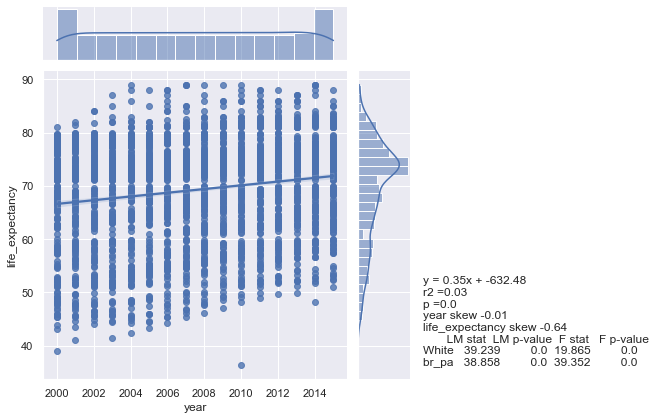

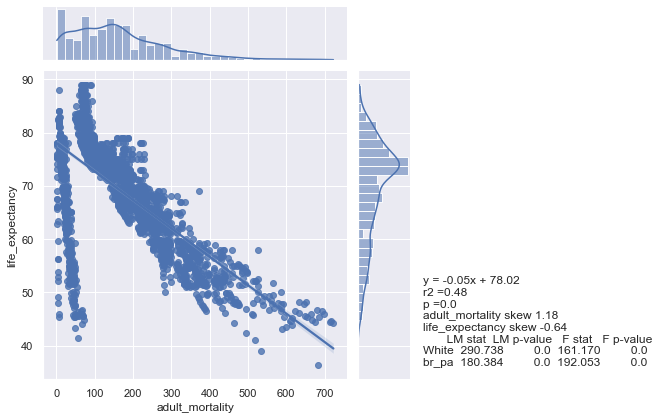

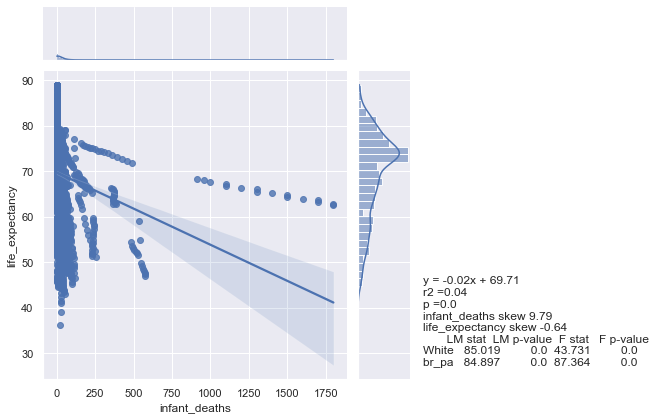

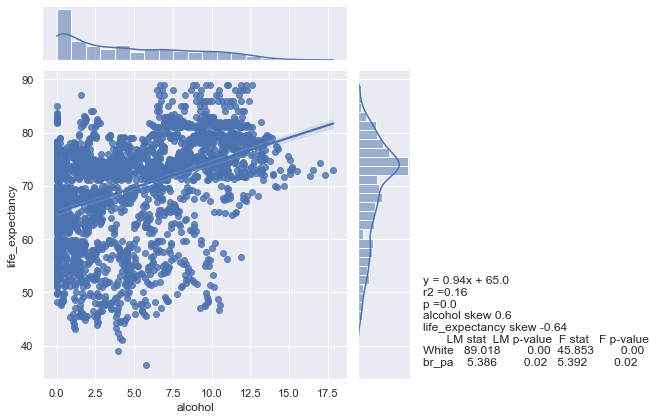

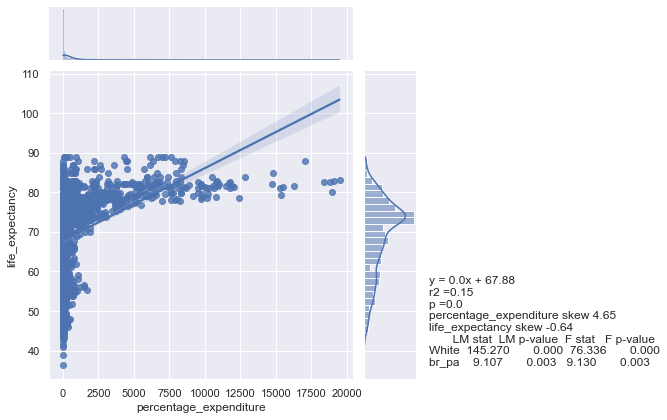

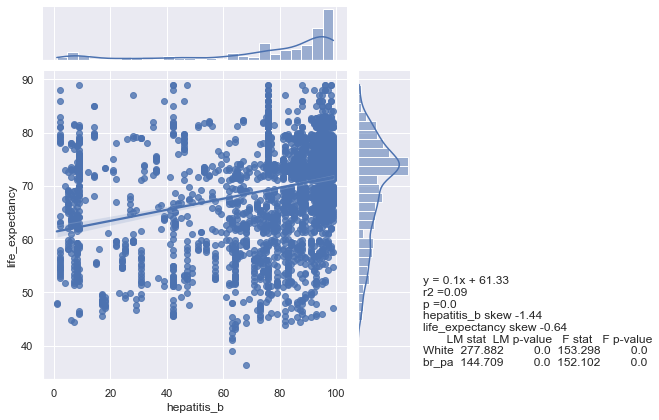

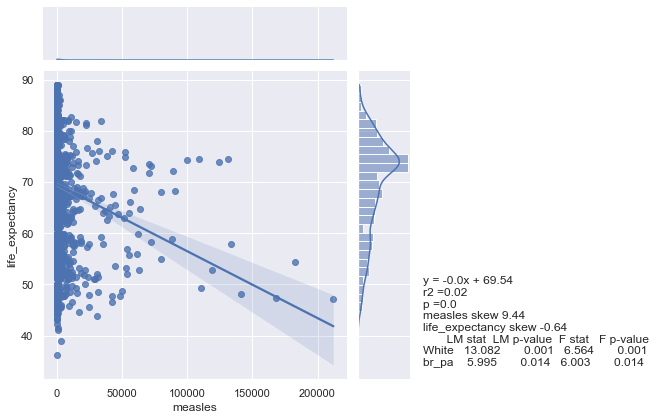

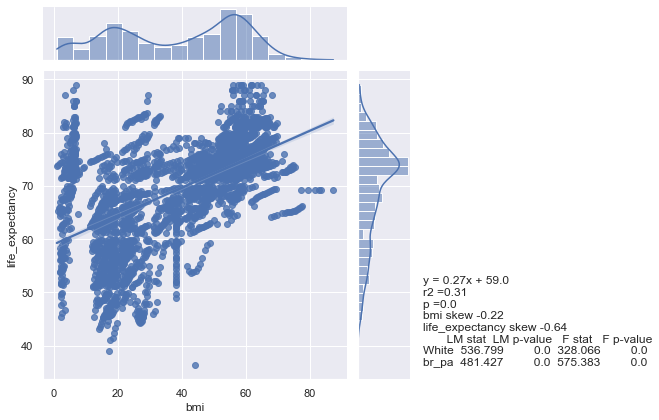

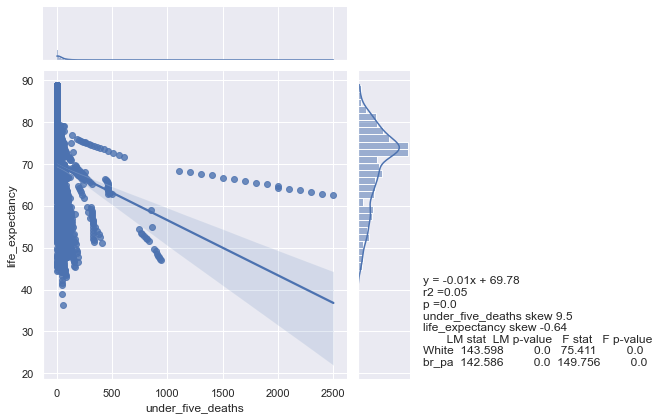

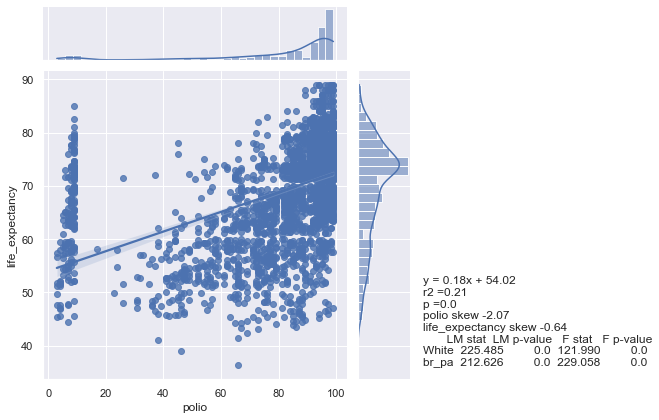

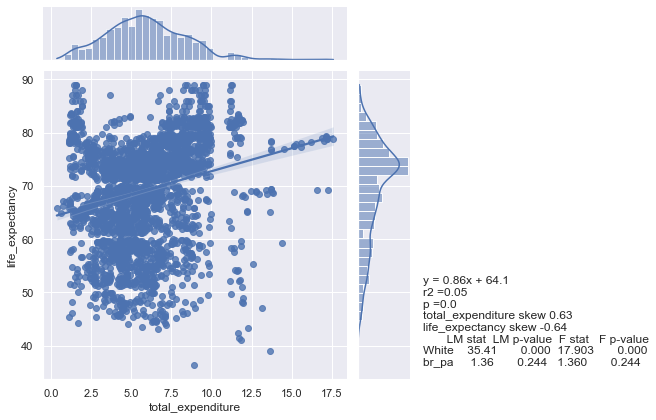

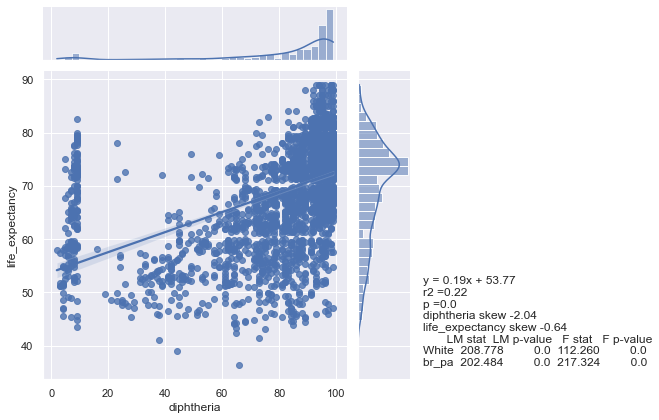

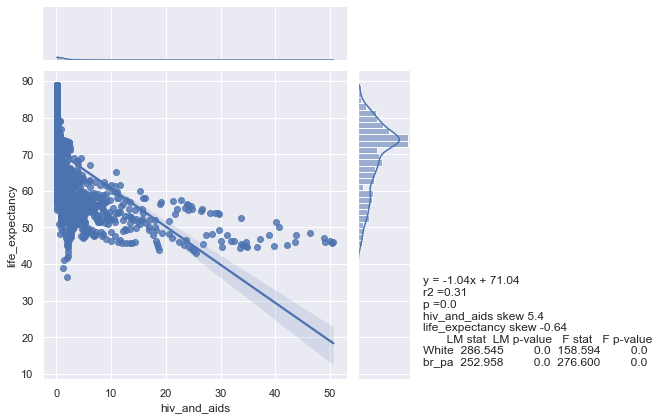

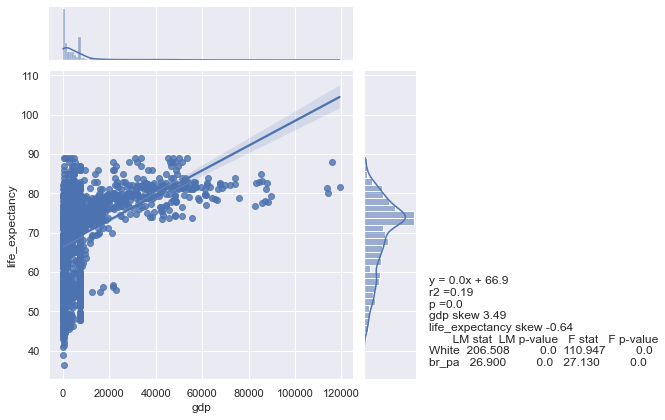

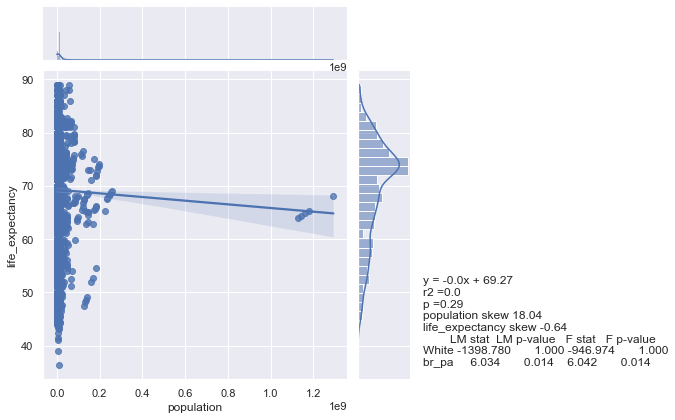

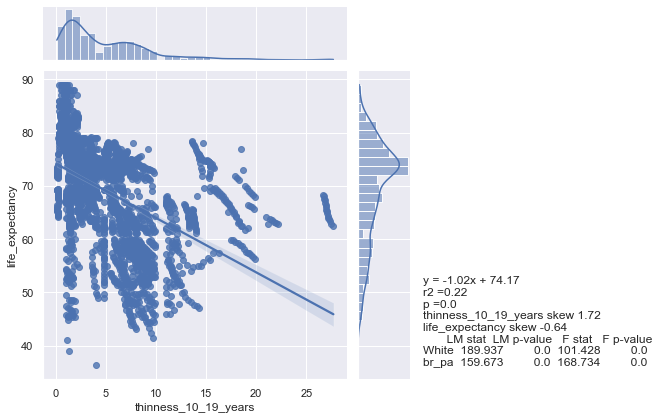

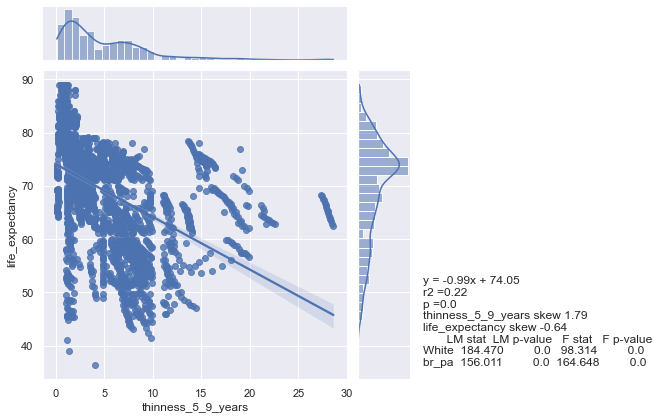

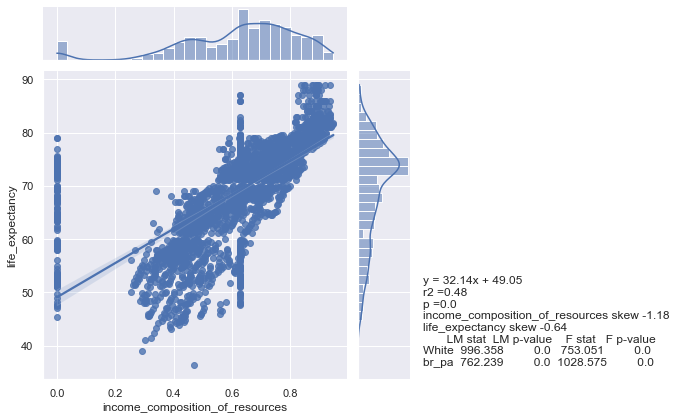

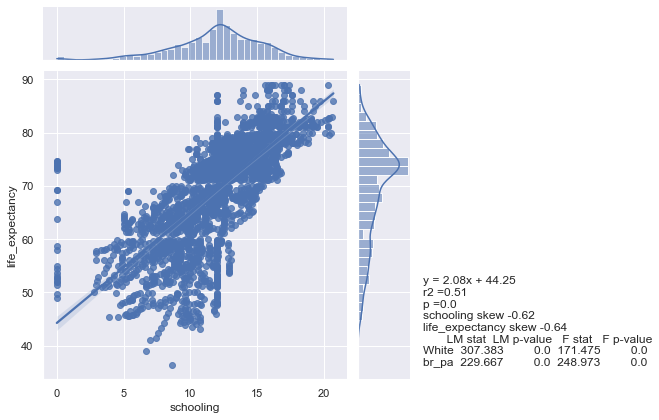

In [229]:
bistats(df , 'life_expectancy')

### FROM THE ABOVE ANALYSIS WE SEELECTED SOME FEATURES BASED ON THE r^2 , F p value , LM p value , skewness

In [333]:
features_not_included = ['measles' , 'thinness_5_9_years' , 'under_five_deaths', 'population', 'gdp' , 'infant_deaths'
                        ,'total_expenditure']

In [334]:
new_df = df.drop(features_not_included , axis=1)
new_df

,country,year,status,life_expectancy,adult_mortality,alcohol,percentage_expenditure,hepatitis_b,bmi,polio,diphtheria,hiv_and_aids,thinness_10_19_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,0.01,71.279624,65.0,19.1,6.0,65.0,0.1,17.2,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,0.01,73.523582,62.0,18.6,58.0,62.0,0.1,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,0.01,73.219243,64.0,18.1,62.0,64.0,0.1,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,0.01,78.184215,67.0,17.6,67.0,67.0,0.1,17.9,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,0.01,7.097109,68.0,17.2,68.0,68.0,0.1,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,4.36,0.000000,68.0,27.1,67.0,65.0,33.6,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,4.06,0.000000,7.0,26.7,7.0,68.0,36.7,9.8,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,4.43,0.000000,73.0,26.3,73.0,71.0,39.8,1.2,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,1.72,0.000000,76.0,25.9,76.0,75.0,42.1,1.6,0.427,9.8


# MODEL BUILDING

### SPLITTING THE DATASET

In [335]:
y=new_df['life_expectancy']
X=new_df.drop('life_expectancy',axis=1)

In [336]:
# df1=df.copy()

# le_country=LabelEncoder()
# le_status=LabelEncoder()
# X["country"]=le_country.fit_transform(X["country"])
# X["status"]=le_status.fit_transform(X["status"])


Country_dummy=pd.get_dummies(X['country'])
status_dummy=pd.get_dummies(X['status'])
X.drop(['country','status'],inplace=True,axis=1)
X=pd.concat([X,Country_dummy,status_dummy],axis=1)

In [337]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

from sklearn.linear_model import LinearRegression
Linear_model= LinearRegression()

Linear_model.fit(X_train,y_train)
Linear_model.score(X_train,y_train)

0.966696956764732